In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import re
from tqdm import tqdm
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 8)

In [2]:
def plot_bar(data, freq, col):
    data = data[col].value_counts()
    df_time = pd.DataFrame(data=data.values,index=data.index, columns=['freq'])
    agg_df_time = df_time.resample(freq).sum()
    g = sns.barplot(x=agg_df_time.index, y=agg_df_time['freq'])
    g.set_xticklabels(rotation=-75, labels = agg_df_time.index)
    g.set_title(col)
    plt.show()

In [3]:
def plot_gr(data, freq, col):
    data = data[col].value_counts()
    df_time = pd.DataFrame(data=data.values,index=data.index, columns=['freq'])
    agg_df_time = df_time.resample(freq).sum()
    plt.plot(agg_df_time.index, agg_df_time.values)

In [4]:
def plot_bar_2(data, col):
    data = data[col].value_counts()
    axis_x = [x.days for x in data.sort_index().index]
    axis_y = data.sort_index().values
    g = sns.barplot(x=axis_x, y=axis_y)
    g.set_xticklabels(rotation=-75, labels = axis_x)
    g.set_title(col)
    plt.show()

# Импорт данных

In [5]:
support_tickets = pd.read_csv('support_tickets.csv')
support_tickets.shape

(397530, 7)

In [6]:
support_tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [7]:
new_items_by_support_users = pd.read_csv('new_items_by_support_users.csv')
new_items_by_support_users.shape

(18559923, 7)

In [8]:
new_items_by_support_users.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"


In [22]:
users_evaluation_of_satisfaction = pd.read_csv('users_evaluation_of_satisfaction.csv')
users_evaluation_of_satisfaction.shape

(217533, 2)

In [23]:
users_evaluation_of_satisfaction.head()

,request_id,result_mentioned_by_user
0,09e34912-b4df-4e91-b3e0-35b40fe6b9b8,Не удовлетворительно
1,76099bef-7ab3-4a01-96c3-4c06f4032a7e,Не удовлетворительно
2,70acfed6-8897-4e38-a407-65150e7a4395,Удовлетворительно
3,64c7a6c8-8bfe-4f35-b662-9091b3472e6f,Не удовлетворительно
4,b08d9414-7167-4f7f-9837-fe6e535f4fb6,Не удовлетворительно


# Оценки

In [24]:
users_evaluation_of_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217533 entries, 0 to 217532
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   request_id                217414 non-null  object
 1   result_mentioned_by_user  217533 non-null  object
dtypes: object(2)
memory usage: 3.3+ MB


In [25]:
users_evaluation_of_satisfaction[users_evaluation_of_satisfaction['request_id'].isna()]

,request_id,result_mentioned_by_user
1093,NaN,Удовлетворительно
2820,NaN,Не удовлетворительно
3474,NaN,Отлично
5149,NaN,Отлично
5491,NaN,Отлично
...,...,...
183299,NaN,Не удовлетворительно
186904,NaN,Удовлетворительно
191818,NaN,Не удовлетворительно
206639,NaN,Не удовлетворительно


In [26]:
users_evaluation_of_satisfaction.dropna(inplace=True)

In [27]:
users_evaluation_of_satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217414 entries, 0 to 217532
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   request_id                217414 non-null  object
 1   result_mentioned_by_user  217414 non-null  object
dtypes: object(2)
memory usage: 5.0+ MB


In [28]:
users_evaluation_of_satisfaction.shape

(217414, 2)

In [29]:
users_evaluation_of_satisfaction['result_mentioned_by_user'].value_counts()

Отлично                 110097
Не удовлетворительно     45675
Хорошо                   31441
Нейтрально               17988
Удовлетворительно        12213
Name: result_mentioned_by_user, dtype: int64

In [31]:
temp = users_evaluation_of_satisfaction['request_id'].value_counts()[users_evaluation_of_satisfaction['request_id'].value_counts() > 1]
temp # ДУБЛИКАТЫ?

4d0c91c2-a8cc-450d-8a93-b93612ee7e71    8
aedc8ee8-6b7f-451e-bf84-361a69729f3e    7
089dd5b2-4704-4c01-88d6-ec48871f8194    7
f4797035-53dc-45bf-86a7-158b4b49d87e    6
fbc8445e-9d34-4ed0-8759-df9283448057    6
                                       ..
7faccc82-5dac-4cd6-80eb-abed179ac1ac    2
b3c009dc-80ec-4068-8fbb-c99953fc6870    2
c888a016-3edc-41fe-9bc1-0aca0563cd0c    2
f88a5f90-570b-4847-9dc6-d2b851167ccf    2
b71f62ad-d56c-46f7-b686-f6bd9529824a    2
Name: request_id, Length: 5803, dtype: int64

In [33]:
temp.sum() - len(temp)

6345

In [34]:
users_evaluation_of_satisfaction[users_evaluation_of_satisfaction['request_id'] == 'b71f62ad-d56c-46f7-b686-f6bd9529824a']

,request_id,result_mentioned_by_user
104694,b71f62ad-d56c-46f7-b686-f6bd9529824a,Хорошо
113904,b71f62ad-d56c-46f7-b686-f6bd9529824a,Хорошо


In [18]:
un_req_rev = set(users_evaluation_of_satisfaction['request_id'].unique()) # уникальные оцененные обращения 
len(un_req_rev)

211069

In [19]:
users_evaluation_of_satisfaction_nodulicates = users_evaluation_of_satisfaction.drop_duplicates()
users_evaluation_of_satisfaction_nodulicates.shape

(211069, 2)

# Обращения в поддержку

In [20]:
support_tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00


In [21]:
support_tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397530 entries, 0 to 397529
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_id             397530 non-null  object
 1   ticket_category     397530 non-null  object
 2   ticket_subcategory  397530 non-null  object
 3   current_state       397530 non-null  object
 4   request_id          397530 non-null  object
 5   activity_start_dt   397530 non-null  object
 6   fact_reaction_dt    397530 non-null  object
dtypes: object(7)
memory usage: 21.2+ MB


In [22]:
support_tickets['current_state'].value_counts() # Все решены?

Решено    397530
Name: current_state, dtype: int64

In [23]:
len(support_tickets['user_id'].unique()) # уникальные пользователи

298957

In [24]:
un_req = set(support_tickets['request_id'].unique()) # уникальные обращения
len(un_req)

397530

In [25]:
len(un_req_rev.intersection(un_req)) # пересечение обращений и отзывов

120422

In [26]:
temp = support_tickets['user_id'].value_counts()
temp # самые популярные пользователи поддержки

46 564 750 136     1517
142 393 000 021     771
109 981 250 055     440
369 071 114         425
383 216 519         352
                   ... 
2 216 818             1
16 665 500 441        1
368 925 890           1
383 048 026           1
175 391 000 007       1
Name: user_id, Length: 298957, dtype: int64

In [27]:
temp.value_counts().sort_index(ascending=False) #кол-во обращений от одного и того же пользователя

1517         1
771          1
440          1
425          1
352          1
         ...  
5         1620
4         3534
3         9780
2        37542
1       244151
Name: user_id, Length: 71, dtype: int64

# Join обращений и отзывов

In [28]:
tickets = support_tickets.merge(users_evaluation_of_satisfaction_nodulicates, left_on='request_id', right_on='request_id', how='left')
tickets.shape

(397530, 8)

In [29]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,NaN
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,NaN
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,NaN
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,NaN


# Расчет CSAT

In [30]:
tickets['result_mentioned_by_user'].notna().sum() # сошлось +

120422

In [31]:
tickets['result_mentioned_by_user'].fillna('Нет отзыва', inplace=True)

In [32]:
temp = tickets['result_mentioned_by_user'].value_counts()
temp

Нет отзыва              277108
Отлично                  59750
Не удовлетворительно     24510
Хорошо                   18555
Нейтрально               10578
Удовлетворительно         7029
Name: result_mentioned_by_user, dtype: int64

In [33]:
all_rev = temp.sum() - temp['Нет отзыва']
all_rev # кол-во обращений с отзывами

120422

In [34]:
good_plus = temp['Хорошо'] + temp['Отлично']
good_plus

78305

In [35]:
CSAT = good_plus/all_rev * 100
CSAT

65.0254936805567

# Время ответа

In [198]:
tickets['activity_start_dt'] = tickets['activity_start_dt'].apply(pd.Timestamp)
tickets['fact_reaction_dt'] = tickets['fact_reaction_dt'].apply(pd.Timestamp)

In [199]:
wrong_reaction_time_index = tickets[tickets['fact_reaction_dt'] < tickets['activity_start_dt']].index

In [200]:
tickets.drop(wrong_reaction_time_index, inplace=True)
tickets.shape

(397522, 8)

In [201]:
tickets['time_answer'] = tickets['fact_reaction_dt'] - tickets['activity_start_dt']

In [202]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00


In [203]:
tickets[tickets['activity_start_dt'] < '2015-09-01'] # Ответы с сентября

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer
11409,385 723 328,Технические вопросы,Подтверждение телефонного номера,Решено,b661908c-fc53-46dd-8fb0-5460517e0e16,2015-08-28 13:33:00,2015-09-03 11:15:00,Отлично,5 days 21:42:00
49929,113 242 750 044,Платные услуги и сервисы,Оплата и применение услуг,Решено,8ac280d7-bd3c-4884-b277-2112a98214e0,2015-08-31 21:05:00,2015-09-04 10:20:00,Нет отзыва,3 days 13:15:00
82916,51 951 000 089,"Магазины, Автозагрузка и юридические лица",Другие вопросы и консультации,Решено,aef69e22-f72c-4ee0-a9a3-793b66e2e98b,2015-08-31 17:19:00,2015-09-01 08:23:00,Нет отзыва,0 days 15:04:00
144509,1 502 913,Технические вопросы,Вход в личный кабинет,Решено,8a2bb4e6-fc44-4f35-a88a-cfef0ad4efff,2015-08-14 18:34:00,2015-09-03 14:56:00,Нет отзыва,19 days 20:22:00
162993,77 919 000 022,"Магазины, Автозагрузка и юридические лица",Автоматическая загрузка объявлений,Решено,3c46e28a-9eb0-4464-a254-912056281e13,2015-08-31 16:02:00,2015-09-01 08:31:00,Отлично,0 days 16:29:00
193716,7 055 000 169,Рекламные сервисы Avito,Оплата компании Avito Промо,Решено,56c99d07-6b7e-4b0a-a220-6a7445321785,2015-08-31 17:03:00,2015-09-02 13:30:00,Нет отзыва,1 days 20:27:00
277210,180 250 121,Платные услуги и сервисы,Оплата и применение услуг,Решено,31430d87-cfb6-48ca-b88f-64ee6d9aa056,2015-08-18 15:50:00,2015-09-02 11:36:00,Нет отзыва,14 days 19:46:00


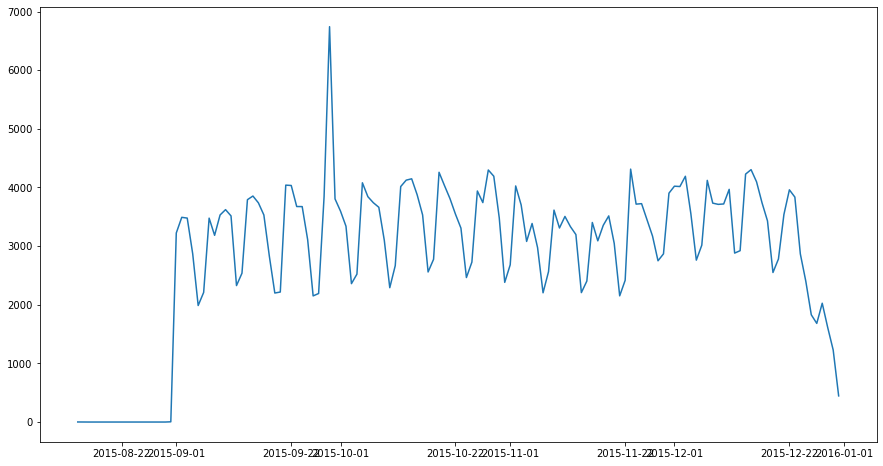

In [204]:
plot_gr(tickets, 'D', 'activity_start_dt')

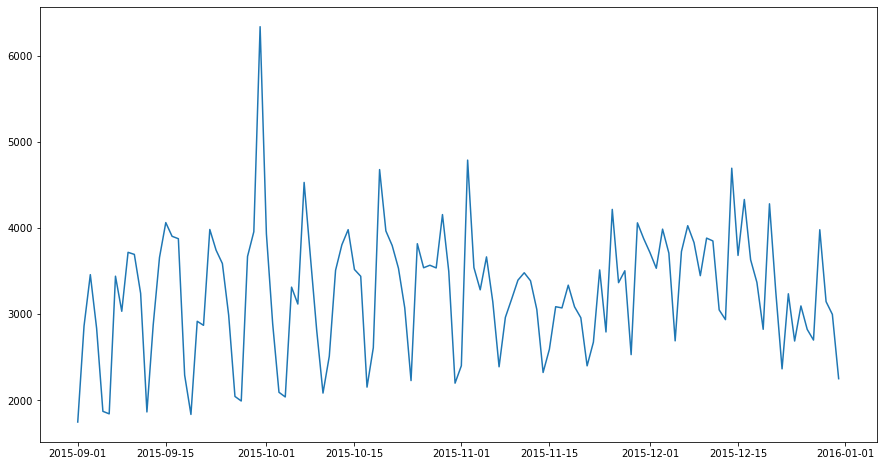

In [205]:
plot_gr(tickets, 'D', 'fact_reaction_dt')

In [206]:
tickets['activity_start_dt'].dt.round('D').value_counts() # кол-во обращений по дням

2015-09-29    6125
2015-09-30    4502
2015-10-29    4479
2015-11-24    4313
2015-12-16    4276
              ... 
2015-12-31    1020
2016-01-01     158
2015-08-15       1
2015-08-29       1
2015-08-19       1
Name: activity_start_dt, Length: 126, dtype: int64

# Общее количество заявок в день — Number of Support Tickets

In [208]:
tickets['activity_start_dt'].dt.round('D').value_counts().mean()

3154.936507936508

In [209]:
tickets['time_answer_days'] = tickets['fact_reaction_dt'].dt.round('D') - tickets['activity_start_dt'].dt.round('D')

In [210]:
tickets

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7 days
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5 days
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9 days
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7 days
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2 days
...,...,...,...,...,...,...,...,...,...,...
397525,144 011 750 056,Блокировки и отклонения,Заблокированная учетная запись,Решено,e0eb978c-282c-4b9a-9998-f1fa688a4f71,2015-09-29 07:09:00,2015-09-29 13:02:00,Нет отзыва,0 days 05:53:00,1 days
397526,144 011 750 056,Блокировки и отклонения,Заблокированная учетная запись,Решено,939ef980-4b59-40dc-9d29-66b47ba77fb6,2015-09-25 13:28:00,2015-09-29 16:38:00,Нет отзыва,4 days 03:10:00,4 days
397527,144 011 750 056,Блокировки и отклонения,Заблокированная учетная запись,Решено,f558d9eb-b278-4d74-a63a-b35674f5a672,2015-10-09 05:24:00,2015-10-09 05:29:00,Нет отзыва,0 days 00:05:00,0 days
397528,144 011 750 056,Блокировки и отклонения,Заблокированная учетная запись,Решено,9359f267-bc96-406d-b054-80cbdf761e11,2015-09-04 05:38:00,2015-09-04 05:43:00,Нет отзыва,0 days 00:05:00,0 days


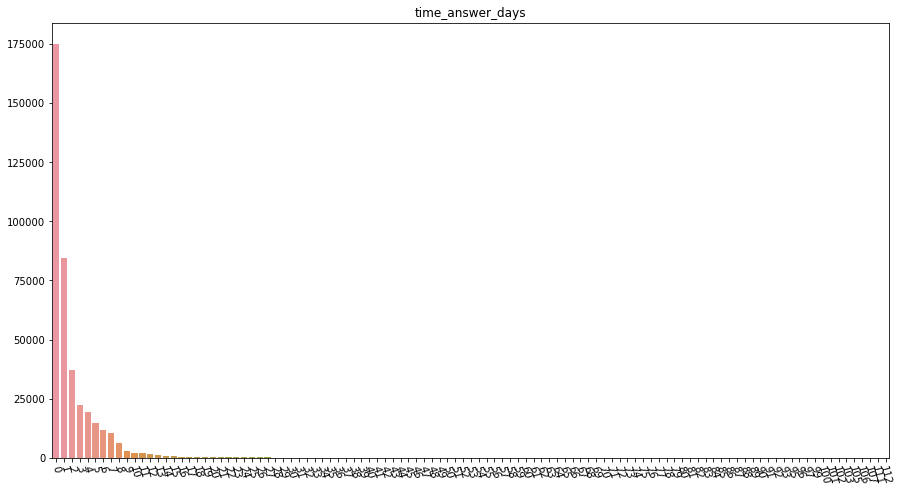

In [211]:
plot_bar_2(tickets, 'time_answer_days')

In [212]:
temp = tickets['time_answer']
temp

0        6 days 13:15:00
1        4 days 21:48:00
2        9 days 12:40:00
3        7 days 18:11:00
4        1 days 06:06:00
               ...      
397525   0 days 05:53:00
397526   4 days 03:10:00
397527   0 days 00:05:00
397528   0 days 00:05:00
397529   1 days 07:44:00
Name: time_answer, Length: 397522, dtype: timedelta64[ns]

In [213]:
temp.value_counts().sort_index(ascending=False)

111 days 20:35:00       1
111 days 18:36:00       1
106 days 16:55:00       1
106 days 10:56:00       1
104 days 12:13:00       1
                     ... 
0 days 00:04:00      3126
0 days 00:03:00      3421
0 days 00:02:00      3405
0 days 00:01:00      2056
0 days 00:00:00       471
Name: time_answer, Length: 22753, dtype: int64

# Среднее время ответа — Average Reply Time (ART)

In [214]:
temp.describe()

count                    397522
mean     2 days 01:53:51.223278
std      3 days 23:08:31.221110
min             0 days 00:00:00
25%             0 days 01:45:00
50%             0 days 16:52:00
75%             2 days 13:41:00
max           111 days 20:35:00
Name: time_answer, dtype: object

# Чистка объявлений и приведение типов данных

In [52]:
need_users = set(tickets['user_id'].unique())
len(need_users)

298952

In [53]:
need_users_item = set(new_items_by_support_users['user_id'].unique())
len(need_users_item)

248260

In [54]:
new_items_by_support_users['user_registration_time'] = new_items_by_support_users['user_registration_time'].apply(pd.Timestamp)
new_items_by_support_users['user_first_listing_date'] = new_items_by_support_users['user_first_listing_date'].apply(pd.Timestamp)
new_items_by_support_users['item_starttime'] = new_items_by_support_users['item_starttime'].apply(pd.Timestamp)

In [55]:
new_items_by_support_users

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи"
...,...,...,...,...,...,...,...
18559918,2 182,2010-10-25 16:04:04,2010-06-25 00:34:20,282 436 000 498,2016-03-31 23:54:18,Транспорт,Запчасти и аксессуары
18559919,72 231 250 008,2014-12-14 15:51:02,2014-12-14 17:07:42,282 436 250 142,2016-03-31 23:34:46,Личные вещи,Детская одежда и обувь
18559920,72 231 250 008,2014-12-14 15:51:02,2014-12-14 17:07:42,282 438 500 028,2016-03-31 23:57:45,Личные вещи,Детская одежда и обувь
18559921,60 120 750 013,2014-10-29 19:25:23,2014-10-29 19:25:23,282 440 500 007,2016-03-31 23:56:36,Транспорт,Запчасти и аксессуары


In [56]:
need_users_item - need_users

{'14\xa0227\xa0250\xa0178',
 '14\xa0797\xa0000\xa0269',
 '254\xa0202',
 '368\xa0798\xa0645'}

In [57]:
drop_index = set()

In [58]:
drop_index = drop_index.union(set(new_items_by_support_users[new_items_by_support_users['user_id'] == '14\xa0227\xa0250\xa0178'].index))
len(drop_index)

950

In [59]:
drop_index = drop_index.union(set(new_items_by_support_users[new_items_by_support_users['user_id'] == '14\xa0797\xa0000\xa0269'].index))
len(drop_index)

1022

In [60]:
drop_index = drop_index.union(set(new_items_by_support_users[new_items_by_support_users['user_id'] == '254\xa0202'].index))
len(drop_index)

4336

In [61]:
drop_index = drop_index.union(set(new_items_by_support_users[new_items_by_support_users['user_id'] == '368\xa0798\xa0645'].index))
len(drop_index)

4375

In [62]:
new_items_by_support_users.drop(drop_index, inplace = True)

In [63]:
set(new_items_by_support_users['user_id']) - need_users

set()

In [64]:
len(need_users - set(new_items_by_support_users['user_id']))

50696

# Удалим обращения без инфы о объявлениях

In [65]:
need_drop = need_users - set(new_items_by_support_users['user_id'])

In [66]:
len(need_drop)

50696

In [67]:
len(tickets['user_id'].unique())

298952

In [68]:
bool_drop = tickets['user_id'].apply(lambda x: x not in need_drop)

In [69]:
tickets_hard = tickets[bool_drop]
tickets_hard.shape

(331877, 10)

In [70]:
len(tickets_hard['user_id'].unique())

248256

In [71]:
tickets[bool_drop.apply(lambda x: not x)]['result_mentioned_by_user'].value_counts()

Нет отзыва              51372
Отлично                  6127
Не удовлетворительно     4166
Хорошо                   1854
Нейтрально               1174
Удовлетворительно         952
Name: result_mentioned_by_user, dtype: int64

In [72]:
tickets['result_mentioned_by_user'].value_counts()

Нет отзыва              277102
Отлично                  59749
Не удовлетворительно     24509
Хорошо                   18555
Нейтрально               10578
Удовлетворительно         7029
Name: result_mentioned_by_user, dtype: int64

In [73]:
len(tickets['user_id'].unique()) - len(tickets_hard['user_id'].unique()) == len(need_drop)

True

# Метрики по клиенту (кол-во листингов за 30 дней до обращений по субкатегориям/категориям, возраст клиента на момент обращения(с момента размещения первого объявления))

### Корректировка id и создание вспомогательных df

In [74]:
def digits(string):
    return re.sub(r'\D', '', string)

In [75]:
tickets_hard['correct_user_id'] = tickets_hard['user_id'].apply(lambda x: digits(x))

c:\users\kiril\pycharmprojects\avito_test\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
len(tickets_hard['user_id'].unique())

248256

In [77]:
len(tickets_hard['correct_user_id'].unique())

248256

In [78]:
new_items_by_support_users['correct_user_id'] = new_items_by_support_users['user_id'].apply(lambda x: digits(x))

In [81]:
len(new_items_by_support_users['user_id'].unique())

248256

In [82]:
len(new_items_by_support_users['correct_user_id'].unique())

248256

In [83]:
new_items_by_support_users.head()

,user_id,user_registration_time,user_first_listing_date,item_id,item_starttime,item_category,item_subcategory,correct_user_id
0,386 341 477,2013-05-27 14:40:09,2013-05-27 14:40:09,8 523 500 011,2014-01-01 02:22:54,Транспорт,Автомобили,386341477
1,6 790 750 024,2013-12-14 23:05:15,2013-12-14 23:27:04,8 525 000 013,2014-01-01 02:45:56,Транспорт,Запчасти и аксессуары,6790750024
2,2 755 740,2011-04-14 17:54:40,2011-04-14 18:05:27,8 527 000 043,2014-01-01 03:29:44,Транспорт,Автомобили,2755740
3,506 779,2011-08-14 06:19:11,2011-08-14 06:50:04,8 530 000 039,2014-01-01 04:34:51,Личные вещи,Красота и здоровье,506779
4,766 896,2013-05-17 11:32:13,2013-06-05 06:05:09,8 534 500 187,2014-01-01 06:07:58,Недвижимость,"Дома, дачи, коттеджи",766896


In [84]:
len(new_items_by_support_users[['item_category', 'item_subcategory']].drop_duplicates())

53

In [85]:
len(new_items_by_support_users['item_subcategory'].drop_duplicates())

53

In [89]:
subcategory_names = new_items_by_support_users['item_subcategory'].unique()

One hot encoding

In [154]:
new_df = pd.get_dummies(new_items_by_support_users['item_subcategory'])
new_df['correct_user_id'] = new_items_by_support_users['correct_user_id']
new_df['item_starttime'] = new_items_by_support_users['item_starttime'].dt.round('D')
new_df['user_first_listing_date'] = new_items_by_support_users['user_first_listing_date'].dt.round('D')
new_df.head()

,Автомобили,Аквариум,Аудио и видео,Билеты и путешествия,Бытовая техника,Вакансии,Велосипеды,Водный транспорт,Гаражи и машиноместа,Готовый бизнес,...,Спорт и отдых,Телефоны,Товары для детей и игрушки,Товары для животных,Товары для компьютера,Фототехника,Часы и украшения,correct_user_id,item_starttime,user_first_listing_date
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,386341477,2014-01-01,2013-05-28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6790750024,2014-01-01,2013-12-15
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2755740,2014-01-01,2011-04-15
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,506779,2014-01-01,2011-08-14
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,766896,2014-01-01,2013-06-05


In [155]:
ticket_subcategories_names = tickets_hard['ticket_subcategory'].unique()

In [156]:
new_tickets_hard = pd.get_dummies(tickets_hard['ticket_subcategory'])
new_tickets_hard['correct_user_id'] = tickets_hard['correct_user_id']
new_tickets_hard['activity_start_dt'] = tickets_hard['activity_start_dt'].dt.round('D')
new_tickets_hard['result_mentioned_by_user'] = tickets_hard['result_mentioned_by_user']
new_tickets_hard['time_answer'] = tickets_hard['time_answer']
new_tickets_hard.head()

,Android приложение,Windows Phone приложение,iPhone приложение,Автоматическая загрузка объявлений,Безналичные платежи,Блокировка или отклонение объявлений,Вход в личный кабинет,Доступ к сайту,Другие вопросы и консультации,Жалобы,...,Снятие объявления с публикации,Создание кампании Avito Контекст,Создание кампании Avito Промо,Технические вопросы,Удаление учетной записи,Управление списками объявлений,correct_user_id,activity_start_dt,result_mentioned_by_user,time_answer
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,370518212,2015-11-27,Хорошо,6 days 13:15:00
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2138799,2015-12-18,Нет отзыва,4 days 21:48:00
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,2033101,2015-12-17,Нет отзыва,9 days 12:40:00
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,37340500064,2015-12-14,Нет отзыва,1 days 06:06:00
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,380618658,2015-12-15,Нет отзыва,0 days 06:04:00


In [157]:
tickets_hard.shape

(331877, 11)

In [158]:
new_tickets_hard.shape

(331877, 55)

In [159]:
new_tickets_hard.columns

Index(['Android приложение', 'Windows Phone приложение', 'iPhone приложение',
       'Автоматическая загрузка объявлений', 'Безналичные платежи',
       'Блокировка или отклонение объявлений', 'Вход в личный кабинет',
       'Доступ к сайту', 'Другие вопросы и консультации', 'Жалобы',
       'Заблокированная учетная запись', 'Заблокированное объявление',
       'Загрузка фото', 'Закрывающие документы',
       'Измерение результатов Avito Контекст',
       'Измерение результатов Avito Промо', 'Кошелек', 'Личный кабинет PRO',
       'Мобильная версия сайта', 'Модерация Avito Контекст',
       'Модерация Avito Промо', 'Мошенническое SMS, MMS или веб-сайт',
       'Мошенническое письмо', 'Настройки Личного кабинета',
       'Не вижу свое оплаченное объявление', 'Некорректная работа поиска',
       'Обман при совершении сделки',
       'Общие вопросы и консультации Avito Контекст',
       'Общие вопросы и консультации Avito Промо', 'Оплата и применение услуг',
       'Оплата компании Avito 

Дата первого листинга и корректный id

In [160]:
new_df.head()

,Автомобили,Аквариум,Аудио и видео,Билеты и путешествия,Бытовая техника,Вакансии,Велосипеды,Водный транспорт,Гаражи и машиноместа,Готовый бизнес,...,Спорт и отдых,Телефоны,Товары для детей и игрушки,Товары для животных,Товары для компьютера,Фототехника,Часы и украшения,correct_user_id,item_starttime,user_first_listing_date
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,386341477,2014-01-01,2013-05-28
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,6790750024,2014-01-01,2013-12-15
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2755740,2014-01-01,2011-04-15
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,506779,2014-01-01,2011-08-14
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,766896,2014-01-01,2013-06-05


In [161]:
first_listing_date_df = new_df[['correct_user_id', 'user_first_listing_date']].groupby(['correct_user_id']).min()

In [162]:
first_listing_date_df.head()

,user_first_listing_date
correct_user_id,
10000000154,2014-01-27
10000008,2010-12-20
100000095,2011-02-14
1000001,2008-10-31
10000010,2008-07-24


In [163]:
first_listing_date_df.shape

(248256, 1)

In [164]:
first_listing_date_df.loc['10000000154']['user_first_listing_date']

Timestamp('2014-01-27 00:00:00')

### Алгоритм вычленения необходимых данных

In [ ]:
# Очень долго :(
days_30 = datetime.timedelta(days=30)
empty = [0]*len(subcategory_names)
X = list()
for row in tqdm(new_tickets_hard.values):
    
    age = row[52] - first_listing_date_df.loc[row[51]]['user_first_listing_date']
    
    data_temp = new_df['correct_user_id'] == row[51]
    data_temp_index = (data_temp['item_starttime'].between(row[52] - days_30, row[52]))
    
    
    t = list(row)
    
    if data_temp.empty:
        t = t + empty + [age]
    else:
        t = t + list(new_df[data_temp_index][subcategory_names].sum().values) + [age]
    X.append(t)

In [150]:
X_all_info = pd.DataFrame(X, columns = list(new_tickets_hard.columns) + list(subcategory_names) + ['Возраст'])

In [151]:
X_all_info

,Android приложение,Windows Phone приложение,iPhone приложение,Автоматическая загрузка объявлений,Безналичные платежи,Блокировка или отклонение объявлений,Вход в личный кабинет,Доступ к сайту,Другие вопросы и консультации,Жалобы,...,Знакомства,Мотоциклы и мототехника,Товары для животных,Велосипеды,Птицы,Аквариум,Готовый бизнес,Недвижимость за рубежом,Заказ услуг,Возраст
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1418 days 14:40:02
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1057 days 22:32:08
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1753 days 07:47:23
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,269 days 11:59:30
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1181 days 19:15:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1223 days 00:13:08
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,483 days 11:21:50
389,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,491 days 21:39:27
390,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,534 days 07:17:53


In [ ]:
X_all_info.to_csv('all_info.csv', index=False)

In [138]:
new_tickets_hard.shape

(331877, 55)

# Относительно лёгкая часть

## Метрики по клиенту: кол-во обращений до текущего обращения, время суток обращения

In [122]:
#tickets['correct_user_id'] = tickets['user_id'].apply(lambda x: digits(x))

In [166]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7 days
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5 days
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9 days
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7 days
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2 days


In [170]:
tickets['hour_of_start']=tickets['activity_start_dt'].apply(lambda x: x.hour)
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,hour_of_start
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7 days,22
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5 days,8
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9 days,19
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7 days,17
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2 days,10


In [176]:
array_count_tickets = []
for row in tqdm(tickets.values):
    temp = len(tickets[(tickets['user_id'] == row[0]) & (tickets['activity_start_dt'] <= row[5])])
    array_count_tickets.append(temp)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 397522/397522 [2:56:18<00:00, 37.58it/s]


In [177]:
len(array_count_tickets)

397522

In [178]:
tickets['array_count_tickets'] = array_count_tickets

In [179]:
#tickets.to_csv('tickets.csv', index=False)

In [68]:
#tickets = pd.read_csv('tickets.csv')
#tickets.shape

(397522, 12)

In [69]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,hour_of_start,array_count_tickets
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00.000000000,7 days 00:00:00.000000000,22,2
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00.000000000,5 days 00:00:00.000000000,8,1
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00.000000000,9 days 00:00:00.000000000,19,1
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00.000000000,7 days 00:00:00.000000000,17,1
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00.000000000,2 days 00:00:00.000000000,10,1


In [70]:
tickets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397522 entries, 0 to 397521
Data columns (total 12 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   user_id                   397522 non-null  object
 1   ticket_category           397522 non-null  object
 2   ticket_subcategory        397522 non-null  object
 3   current_state             397522 non-null  object
 4   request_id                397522 non-null  object
 5   activity_start_dt         397522 non-null  object
 6   fact_reaction_dt          397522 non-null  object
 7   result_mentioned_by_user  397522 non-null  object
 8   time_answer               397522 non-null  object
 9   time_answer_days          397522 non-null  object
 10  hour_of_start             397522 non-null  int64 
 11  array_count_tickets       397522 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 36.4+ MB


# Кол-во отзывов с разбивкой по оценке

In [31]:
from collections import Counter

In [52]:
a = Counter()

In [53]:
a += Counter(['Хорошо'])
a

Counter({'Хорошо': 1})

In [73]:
array_count_counters = []
for row in tqdm(tickets.values):
    temp = Counter(tickets[(tickets['user_id'] == row[0]) & (tickets['activity_start_dt'] < row[5])]['result_mentioned_by_user'])
    temp = [temp['Не удовлетворительно'], temp['Удовлетворительно'], temp['Нейтрально'], temp['Хорошо'], 
     temp['Отлично'],temp['Нет отзыва']]
    array_count_counters.append(temp)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 397522/397522 [4:44:15<00:00, 23.31it/s]


In [75]:
count_score = pd.DataFrame(array_count_counters, columns=['Не удовлетворительно', 'Удовлетворительно', 'Нейтрально', 'Хорошо', 
     'Отлично', 'Нет отзыва'])

In [76]:
count_score.head()

,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [78]:
count_score.index = tickets.index

In [81]:
#count_score.to_csv('count_score.csv', index=False)

# Выходной или нет (праздники лень искать как учитывать)

In [71]:
tickets['activity_start_dt'] = tickets['activity_start_dt'].apply(lambda x: pd.Timestamp(x))

In [72]:
tickets['is_holyday'] = tickets['activity_start_dt'].apply(lambda x: x.dayofweek > 5)

# Препроцессинг

In [73]:
tickets['time_answer'] = tickets['time_answer'].apply(lambda x: pd.Timedelta(x))

In [74]:
from sklearn.preprocessing import StandardScaler

In [75]:
scaler = StandardScaler()
seconds = np.array(tickets['time_answer'].apply(lambda x: x.total_seconds())).reshape(-1,1)
scaler.fit(seconds)
standart_feature = scaler.transform(seconds)

In [76]:
tickets.columns

Index(['user_id', 'ticket_category', 'ticket_subcategory', 'current_state',
       'request_id', 'activity_start_dt', 'fact_reaction_dt',
       'result_mentioned_by_user', 'time_answer', 'time_answer_days',
       'hour_of_start', 'array_count_tickets', 'is_holyday'],
      dtype='object')

In [77]:
#count_score = pd.read_csv('count_score.csv')
count_score.columns

Index(['Не удовлетворительно', 'Удовлетворительно', 'Нейтрально', 'Хорошо',
       'Отлично', 'Нет отзыва'],
      dtype='object')

In [78]:
tickets['ticket_category'].unique()

array(['Технические вопросы', 'Мобильный Avito',
       'Рекламные сервисы Avito', 'Платные услуги и сервисы',
       'Блокировки и отклонения',
       'Работа с объявлениями и личным кабинетом',
       'Магазины, Автозагрузка и юридические лица',
       'Безопасность на Avito'], dtype=object)

In [91]:
count_score

,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
397517,0,0,0,0,0,3
397518,0,0,0,0,0,2
397519,0,0,0,0,0,4
397520,0,0,0,0,0,0


In [47]:
new_tickets = pd.DataFrame()
new_tickets = pd.get_dummies(tickets['ticket_category']) 
new_tickets['result_mentioned_by_user'] = tickets['result_mentioned_by_user']
new_tickets['time_answer'] = standart_feature
new_tickets['hour_of_start'] = tickets['hour_of_start']
#new_tickets['array_count_tickets'] = tickets['array_count_tickets']
new_tickets[count_score.columns] = count_score
new_tickets.head()

,Безопасность на Avito,Блокировки и отклонения,"Магазины, Автозагрузка и юридические лица",Мобильный Avito,Платные услуги и сервисы,Работа с объявлениями и личным кабинетом,Рекламные сервисы Avito,Технические вопросы,result_mentioned_by_user,time_answer,hour_of_start,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва
0,0,0,0,0,0,0,0,1,Хорошо,1.128340,22,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,Нет отзыва,0.713697,8,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,Нет отзыва,1.878974,19,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,Нет отзыва,1.432448,17,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,Нет отзыва,-0.208085,10,0,0,0,0,0,0


In [48]:
control_X = new_tickets[new_tickets['result_mentioned_by_user'] == 'Нет отзыва'].drop('result_mentioned_by_user', axis=1)
train = new_tickets[new_tickets['result_mentioned_by_user'] != 'Нет отзыва']

In [49]:
#X = np.array(train['time_answer']).reshape(-1,1)
X = train.drop('result_mentioned_by_user', axis=1)
y = train['result_mentioned_by_user']

In [50]:
X.shape

(120420, 16)

# Обучение

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

param = {
    'max_depth': [5, 10, 15],
    'n_estimators':[100, 200, 250, 300]
}

grid_random_forest = GridSearchCV(estimator=RandomForestClassifier()
                            , cv=3
                            , param_grid = param
                            , n_jobs = -1
                           )

In [117]:
%%time
grid_random_forest.fit(X_train, y_train)

Wall time: 2min 43s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 25],
                         'n_estimators': [100, 200, 300]})

In [118]:
print(grid_random_forest.best_estimator_)

RandomForestClassifier(max_depth=10, n_estimators=200)


In [119]:
grid_random_forest.best_estimator_.feature_importances_

array([0.00564535, 0.05326296, 0.00243842, 0.00045765, 0.01326967,
       0.02291306, 0.00263391, 0.04515996, 0.19865579, 0.04143103,
       0.27085145, 0.04510381, 0.05931614, 0.06754519, 0.09806461,
       0.073251  ])

In [120]:
y_pred = grid_random_forest.predict(X_test)

print("Accurancy: ", accuracy_score(y_test, y_pred))

Accurancy:  0.5367048663012789


In [121]:
y_test

294621       Отлично
350630       Отлично
136234    Нейтрально
64448        Отлично
26833        Отлично
             ...    
200052       Отлично
149213       Отлично
51659         Хорошо
77211        Отлично
20193        Отлично
Name: result_mentioned_by_user, Length: 24084, dtype: object

In [122]:
pd.Series(y_pred).value_counts()

Отлично                 21239
Не удовлетворительно     2071
Хорошо                    423
Нейтрально                242
Удовлетворительно         109
dtype: int64

In [123]:
y_test.value_counts()

Отлично                 11956
Не удовлетворительно     4872
Хорошо                   3657
Нейтрально               2151
Удовлетворительно        1448
Name: result_mentioned_by_user, dtype: int64

In [106]:
y_train.value_counts()

Отлично                 47793
Не удовлетворительно    19637
Хорошо                  14898
Нейтрально               8427
Удовлетворительно        5581
Name: result_mentioned_by_user, dtype: int64

# Только критики и сторонники

In [54]:
new_tickets.head()

,Безопасность на Avito,Блокировки и отклонения,"Магазины, Автозагрузка и юридические лица",Мобильный Avito,Платные услуги и сервисы,Работа с объявлениями и личным кабинетом,Рекламные сервисы Avito,Технические вопросы,result_mentioned_by_user,time_answer,hour_of_start,Не удовлетворительно,Удовлетворительно,Нейтрально,Хорошо,Отлично,Нет отзыва
0,0,0,0,0,0,0,0,1,Хорошо,1.128340,22,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,Нет отзыва,0.713697,8,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,Нет отзыва,1.878974,19,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,Нет отзыва,1.432448,17,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,Нет отзыва,-0.208085,10,0,0,0,0,0,0


In [55]:
to_short ={'Хорошо': 'сторонник', 'Нет отзыва': 'инкогнито', 'Отлично': 'сторонник', 'Нейтрально': 'нейтрал',
       'Не удовлетворительно': 'критик', 'Удовлетворительно': 'критик'}

In [56]:
answer = tickets['result_mentioned_by_user'].apply(lambda x: to_short[x])

In [57]:
tickets_short = pd.DataFrame()
tickets_short = pd.get_dummies(tickets['ticket_category']) 
tickets_short['result_mentioned_by_user'] = answer
tickets_short['time_answer'] = standart_feature
tickets_short['hour_of_start'] = tickets['hour_of_start']

tickets_short['негативные'] = new_tickets['Не удовлетворительно'] + new_tickets['Удовлетворительно']
tickets_short['нейтральные'] = new_tickets['Нейтрально']
tickets_short['положительные'] = new_tickets['Хорошо'] + new_tickets['Отлично']
tickets_short['неизвестные'] = new_tickets['Нет отзыва']
tickets_short['is_holyday'] = tickets['is_holyday']


tickets_short.head()

,Безопасность на Avito,Блокировки и отклонения,"Магазины, Автозагрузка и юридические лица",Мобильный Avito,Платные услуги и сервисы,Работа с объявлениями и личным кабинетом,Рекламные сервисы Avito,Технические вопросы,result_mentioned_by_user,time_answer,hour_of_start,негативные,нейтральные,положительные,неизвестные,is_holyday
0,0,0,0,0,0,0,0,1,сторонник,1.128340,22,0,0,0,1,False
1,0,0,0,0,0,0,0,1,инкогнито,0.713697,8,0,0,0,0,False
2,0,0,0,0,0,0,0,1,инкогнито,1.878974,19,0,0,0,0,False
3,0,0,0,1,0,0,0,0,инкогнито,1.432448,17,0,0,0,0,False
4,0,0,0,0,0,0,0,1,инкогнито,-0.208085,10,0,0,0,0,False


In [58]:
tickets_short.shape

(397522, 16)

In [59]:
control_X_short = tickets_short[tickets_short['result_mentioned_by_user'] == 'инкогнито'].drop('result_mentioned_by_user', axis=1)
train_short = tickets_short[tickets_short['result_mentioned_by_user'] != 'инкогнито']

In [60]:
#X = np.array(train['time_answer']).reshape(-1,1)
X_short = train_short.drop('result_mentioned_by_user', axis=1)
y_short = train_short['result_mentioned_by_user']

In [61]:
X_short.shape

(120420, 15)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X_short, y_short, test_size=0.2, random_state=1234)

param = {
    'max_depth': [5, 10, 15],
    'n_estimators':[100, 200, 250, 300]
}

grid_random_forest = GridSearchCV(estimator=RandomForestClassifier()
                            , cv=3
                            , param_grid = param
                            , n_jobs = -1
                           )

In [242]:
%%time
grid_random_forest.fit(X_train, y_train)

Wall time: 1min 27s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 250, 300]})

In [243]:
print(grid_random_forest.best_estimator_)

RandomForestClassifier(max_depth=10, n_estimators=250)


In [256]:
features = list(zip(grid_random_forest.best_estimator_.feature_importances_, X_short.columns))
features.sort(key=lambda x: x[0], reverse=True)
features

[(0.3452453457517379, 'негативные'),
 (0.21292438306593509, 'time_answer'),
 (0.0759993855806492, 'неизвестные'),
 (0.07507439272375328, 'положительные'),
 (0.06935313249837285, 'Блокировки и отклонения'),
 (0.06040275871142811, 'Технические вопросы'),
 (0.0535260163790691, 'нейтральные'),
 (0.04695564500916806, 'hour_of_start'),
 (0.027701082103151184, 'Работа с объявлениями и личным кабинетом'),
 (0.013185028231565563, 'Платные услуги и сервисы'),
 (0.006372448167709727, 'is_holyday'),
 (0.006191220901905759, 'Безопасность на Avito'),
 (0.0036983935441010584, 'Рекламные сервисы Avito'),
 (0.0026633488012936263, 'Магазины, Автозагрузка и юридические лица'),
 (0.0007074185301594362, 'Мобильный Avito')]

In [315]:
y_pred = grid_random_forest.predict(X_test)

print("Accurancy: ", accuracy_score(y_test, y_pred))

Accurancy:  0.6822786912473011


In [317]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 1094,    31,  5195],
       [  108,    48,  1995],
       [  308,    15, 15290]], dtype=int64)

In [318]:
y_test.value_counts()

сторонник    15613
критик        6320
нейтрал       2151
Name: result_mentioned_by_user, dtype: int64

In [319]:
pd.Series(y_pred).value_counts()

сторонник    22480
критик        1510
нейтрал         94
dtype: int64

In [260]:
y_train.value_counts()

сторонник    62691
критик       25218
нейтрал       8427
Name: result_mentioned_by_user, dtype: int64

# Подсчёт предсказанного SCAT

In [263]:
y_control_pred = grid_random_forest.predict(control_X_short)

In [268]:
temp = pd.Series(y_control_pred).value_counts()
temp

сторонник    265248
критик        11303
нейтрал         551
dtype: int64

In [269]:
CSAT_predicted = (good_plus + temp['сторонник'])/(all_rev + temp.sum())  * 100
CSAT_predicted

86.42320966784396

# Визуализация отзывов

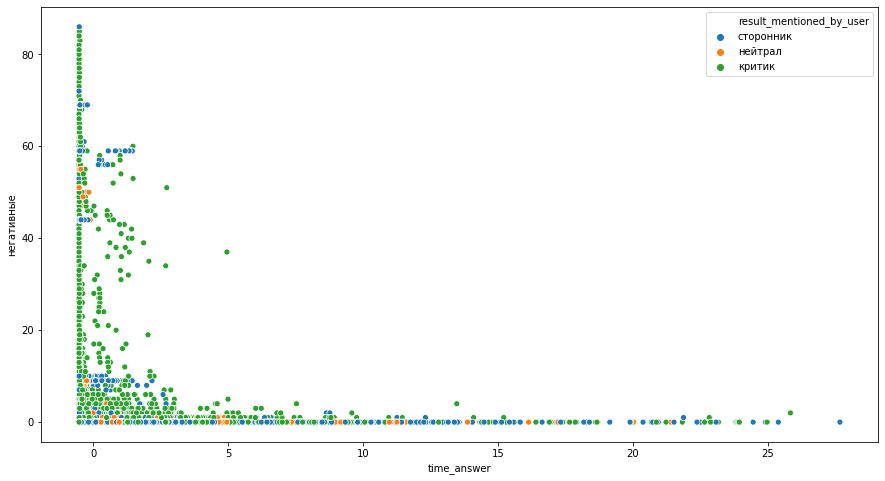

In [62]:
sns.scatterplot(x=train_short['time_answer'], y=train_short['негативные'], hue=train_short['result_mentioned_by_user'])

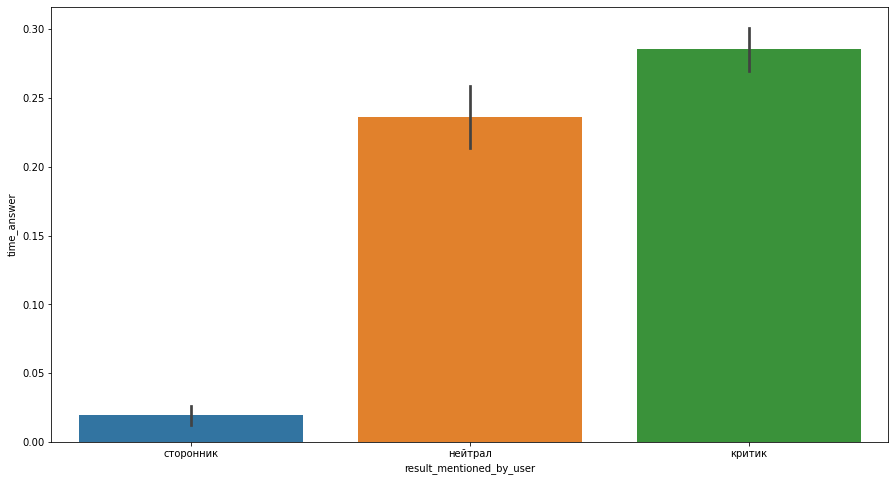

In [63]:
sns.barplot(x=train_short['result_mentioned_by_user'], y=train_short['time_answer'])

In [64]:
train_short[['result_mentioned_by_user', 'time_answer']].groupby('result_mentioned_by_user').mean()

,time_answer
result_mentioned_by_user,
критик,0.285650
нейтрал,0.236395
сторонник,0.019290


# Переход к бинарной классификации

In [65]:
to_binary ={'Хорошо': 0, 'Нет отзыва': -1, 'Отлично': 0, 'Нейтрально': 1,
       'Не удовлетворительно': 1, 'Удовлетворительно': 1}

In [66]:
answer_binary = tickets['result_mentioned_by_user'].apply(lambda x: to_binary[x])

In [67]:
tickets_binary = pd.DataFrame()
tickets_binary = pd.get_dummies(tickets['ticket_category']) 
tickets_binary['result_mentioned_by_user'] = answer_binary
tickets_binary['time_answer'] = standart_feature
tickets_binary['hour_of_start'] = tickets['hour_of_start']

tickets_binary['неположительные']=new_tickets['Не удовлетворительно']+new_tickets['Удовлетворительно']+new_tickets['Нейтрально']
tickets_binary['положительные'] = new_tickets['Хорошо'] + new_tickets['Отлично']
#tickets_binary['неизвестные'] = new_tickets['Нет отзыва']
tickets_binary['is_holyday'] = tickets['is_holyday']


tickets_binary.head()

,Безопасность на Avito,Блокировки и отклонения,"Магазины, Автозагрузка и юридические лица",Мобильный Avito,Платные услуги и сервисы,Работа с объявлениями и личным кабинетом,Рекламные сервисы Avito,Технические вопросы,result_mentioned_by_user,time_answer,hour_of_start,неположительные,положительные,is_holyday
0,0,0,0,0,0,0,0,1,0,1.128340,22,0,0,False
1,0,0,0,0,0,0,0,1,-1,0.713697,8,0,0,False
2,0,0,0,0,0,0,0,1,-1,1.878974,19,0,0,False
3,0,0,0,1,0,0,0,0,-1,1.432448,17,0,0,False
4,0,0,0,0,0,0,0,1,-1,-0.208085,10,0,0,False


In [68]:
tickets_binary.shape

(397522, 14)

In [132]:
#tickets_binary.to_csv('tickets_binary.csv', index=False)

In [81]:
#tickets['fact_reaction_dt'] = tickets['fact_reaction_dt'].apply(lambda x: pd.Timestamp(x))

In [82]:
tickets.head()

,user_id,ticket_category,ticket_subcategory,current_state,request_id,activity_start_dt,fact_reaction_dt,result_mentioned_by_user,time_answer,time_answer_days,hour_of_start,array_count_tickets,is_holyday
0,370 518 212,Технические вопросы,Доступ к сайту,Решено,045be6ac-d532-4c20-b1c9-fb82c1737464,2015-11-26 22:56:00,2015-12-03 12:11:00,Хорошо,6 days 13:15:00,7 days 00:00:00.000000000,22,2,False
1,2 138 799,Технические вопросы,Доступ к сайту,Решено,8ebbb8c6-7abb-4fad-a83b-35a71a83a186,2015-12-18 08:52:00,2015-12-23 06:40:00,Нет отзыва,4 days 21:48:00,5 days 00:00:00.000000000,8,1,False
2,2 033 101,Технические вопросы,Доступ к сайту,Решено,ee303751-4a21-4544-a4c3-56924c088028,2015-12-16 19:06:00,2015-12-26 07:46:00,Нет отзыва,9 days 12:40:00,9 days 00:00:00.000000000,19,1,False
3,177 122 000 003,Мобильный Avito,Android приложение,Решено,bb989fcb-277a-41bd-aaa2-f131333b629e,2015-12-01 17:08:00,2015-12-09 11:19:00,Нет отзыва,7 days 18:11:00,7 days 00:00:00.000000000,17,1,False
4,37 340 500 064,Технические вопросы,Доступ к сайту,Решено,e742d172-0ef1-47d8-b862-25be082d8bc0,2015-12-14 10:08:00,2015-12-15 16:14:00,Нет отзыва,1 days 06:06:00,2 days 00:00:00.000000000,10,1,False


In [83]:
#tickets['hour_of_answer']=tickets['fact_reaction_dt'].apply(lambda x: x.hour)

In [94]:
#tickets_binary[pd.get_dummies(tickets['ticket_subcategory']).columns] = pd.get_dummies(tickets['ticket_subcategory'])

In [97]:
#tickets_binary.to_csv('tickets_binary_full.csv',index=False)

In [8]:
tickets_binary = pd.read_csv('tickets_binary.csv')
tickets_binary.shape

(397522, 14)

In [85]:
tickets_binary['hour_of_answer'] = tickets['hour_of_answer']

In [120]:
tickets_binary.head()

,Безопасность на Avito,Блокировки и отклонения,"Магазины, Автозагрузка и юридические лица",Мобильный Avito,Платные услуги и сервисы,Работа с объявлениями и личным кабинетом,Рекламные сервисы Avito,Технические вопросы,result_mentioned_by_user,time_answer,...,Пополнение кошелька,Проблема с отправкой сообщений,Регистрация учетной записи,Редактирование объявления,Реквизиты организации,Снятие объявления с публикации,Создание кампании Avito Контекст,Создание кампании Avito Промо,Удаление учетной записи,Управление списками объявлений
0,0,0,0,0,0,0,0,0,0,1.128340,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,-1,0.713697,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,-1,1.878974,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,-1,1.432448,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,-1,-0.208085,...,0,0,0,0,0,0,0,0,0,0


In [359]:
#tickets_binary.to_csv('tickets_binary_full_another.csv', index=False)

In [37]:
tickets_binary = pd.read_csv('tickets_binary_full.csv')
tickets_binary.shape

(397522, 65)

In [283]:
to_another_binary ={0: 1, 1: 0, -1: -1}
tickets_binary['result_mentioned_by_user'] = tickets_binary['result_mentioned_by_user'].apply(lambda x: to_another_binary[x])

In [285]:
control_X_binary = tickets_binary[tickets_binary['result_mentioned_by_user'] == -1].drop('result_mentioned_by_user', axis=1)
train_binary = tickets_binary[tickets_binary['result_mentioned_by_user'] != -1]

In [286]:
#X = np.array(train['time_answer']).reshape(-1,1)
X_binary = train_binary.drop('result_mentioned_by_user', axis=1)
y_binary = train_binary['result_mentioned_by_user']

In [287]:
X_binary.shape

(120420, 64)

In [288]:
def scorer(y_true, y_predicted):
    true_metric = y_true.value_counts()[0]
    predicted_metric = pd.Series(y_predicted).value_counts()[0]
    error = (true_metric - predicted_metric)**2
    return error

In [289]:
from sklearn.metrics import make_scorer
import math
my_scorer = make_scorer(scorer, greater_is_better=False)

# Random forest

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2)

param = {
#    'max_depth': [5, 10, 15],
    'n_estimators': [300, 400]
}

grid_random_forest = GridSearchCV(estimator=RandomForestClassifier()
                            , cv=3
                            , param_grid = param
                            , scoring='precision'
                            , n_jobs = -1
                           )

In [292]:
%%time
grid_random_forest.fit(X_train, y_train)

Wall time: 1min 52s


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'n_estimators': [300, 400]}, scoring='precision')

In [293]:
print(grid_random_forest.best_estimator_)

RandomForestClassifier(n_estimators=300)


In [294]:
grid_random_forest.best_score_

nan

In [295]:
grid_random_forest.cv_results_

{'mean_fit_time': array([36.67622399, 37.54202318]),
 'std_fit_time': array([ 8.77796368, 12.43828021]),
 'mean_score_time': array([2.23036846, 1.38773831]),
 'std_score_time': array([1.57711754, 1.96255834]),
 'param_n_estimators': masked_array(data=[300, 400],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 300}, {'n_estimators': 400}],
 'split0_test_score': array([nan, nan]),
 'split1_test_score': array([0.72164716, 0.72200477]),
 'split2_test_score': array([0.72269594,        nan]),
 'mean_test_score': array([nan, nan]),
 'std_test_score': array([nan, nan]),
 'rank_test_score': array([1, 2])}

In [296]:
grid_random_forest.scorer_

make_scorer(precision_score, average=binary)

In [297]:
features = list(zip(grid_random_forest.best_estimator_.feature_importances_, X_binary.columns))
features.sort(key=lambda x: x[0], reverse=True)
features[:5]

[(0.5607898324571569, 'time_answer'),
 (0.13793269395305366, 'hour_of_answer'),
 (0.1355684684639347, 'hour_of_start'),
 (0.056577599199635877, 'неположительные'),
 (0.02184009743966234, 'положительные')]

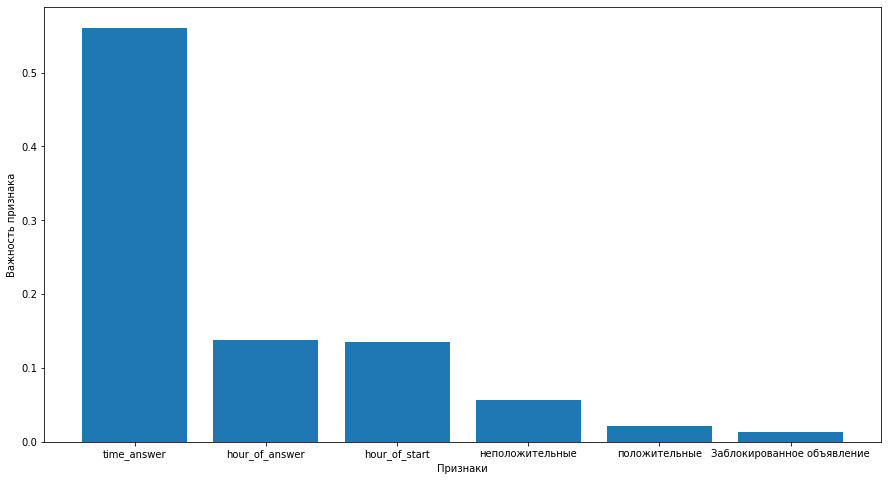

In [298]:
fig, ax = plt.subplots()
ax.bar(list(map(lambda x: x[1],list(features[:6]))), list(map(lambda x: x[0],list(features[:6]))))
ax.set_xlabel('Признаки')
ax.set_ylabel('Важность признака')
#plt.xticks(list(map(str,list(good_df.index))))
plt.show()

In [299]:
from sklearn.metrics import f1_score, classification_report
from joblib import dump, load
#clf = load('rf.joblib')

#y_pred = clf.predict(X_test)
y_pred = grid_random_forest.predict(X_test)

print("F1: ", f1_score(y_test, y_pred))
print("Accurancy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1:  0.741702472134006
Accurancy:  0.6555389470187677
              precision    recall  f1-score   support

           0       0.51      0.46      0.48      8471
           1       0.72      0.76      0.74     15613

    accuracy                           0.66     24084
   macro avg       0.62      0.61      0.61     24084
weighted avg       0.65      0.66      0.65     24084



In [300]:
y_proba = grid_random_forest.predict_proba(X_test)

In [338]:
temp = [i for i in zip(y_proba[:,0], y_proba[:,1], y_test, y_pred)]
treshholds = [0.8,0.85,0.9,0.95, 0.96, 0.97, 0.98, 0.99]
accurancy_array = []
count_array = []
for i in treshholds:
    temp_1 = np.array(temp)[[list(map(lambda x: abs(x[0] - x[1]) >= i and abs(x[0] - x[1]) < 1, temp))]]
    accurancy_array.append(accuracy_score(temp_1[:,2], temp_1[:,3]))
    count_array.append(len(temp_1))

c:\users\kiril\pycharmprojects\avito_test\venv\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


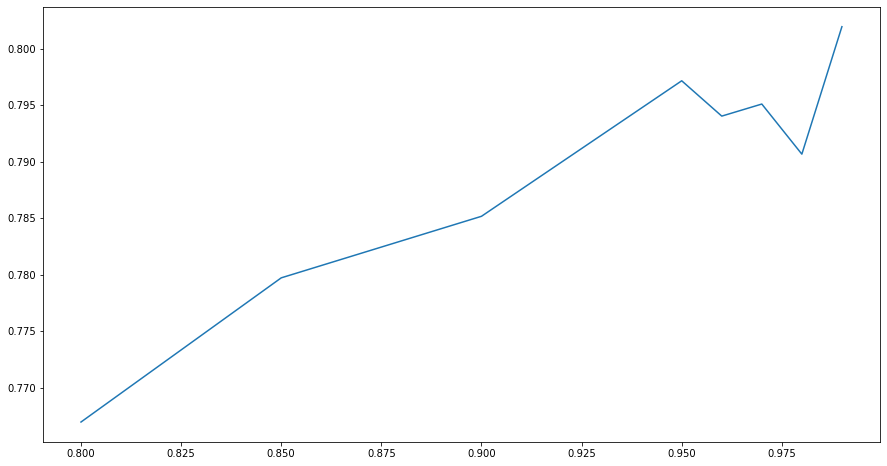

In [339]:
plt.plot(treshholds, accurancy_array)
plt.show()

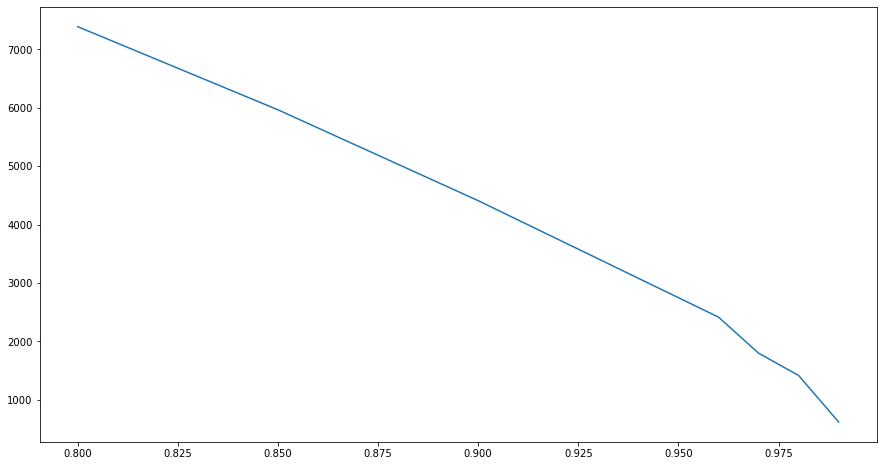

In [340]:
plt.plot(treshholds, count_array)
plt.show()

In [341]:
accurancy_array

[0.7669508729192043,
 0.7797150041911148,
 0.7851633393829401,
 0.7971595047341588,
 0.7940323249067551,
 0.7951002227171492,
 0.7906647807637907,
 0.801948051948052]

In [342]:
count_array

[7389, 5965, 4408, 2746, 2413, 1796, 1414, 616]

In [360]:
temp_1 = np.array(temp)[[list(map(lambda x: abs(x[0] - x[1]) >= 0.95, temp))]]

c:\users\kiril\pycharmprojects\avito_test\venv\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  """Entry point for launching an IPython kernel.


In [361]:
confusion_matrix(temp_1[:,2], temp_1[:,3])

array([[ 272,  611],
       [  95, 2505]], dtype=int64)

In [362]:
print(classification_report(temp_1[:,2], temp_1[:,3]))

              precision    recall  f1-score   support

         0.0       0.74      0.31      0.44       883
         1.0       0.80      0.96      0.88      2600

    accuracy                           0.80      3483
   macro avg       0.77      0.64      0.66      3483
weighted avg       0.79      0.80      0.76      3483



In [363]:
pd.Series(temp_1[:,2]).value_counts()[1]/pd.Series(temp_1[:,2]).value_counts().sum()

0.7464829170255527

In [364]:
pd.Series(temp_1[:,3]).value_counts()[1]/pd.Series(temp_1[:,3]).value_counts().sum()

0.8946310651737008

In [28]:
#X_test.to_csv('test_data.csv')

In [350]:
from sklearn.metrics import confusion_matrix, precision_score
confusion_matrix(y_test, y_pred)

array([[ 3877,  4594],
       [ 3702, 11911]], dtype=int64)

In [353]:
y_test.value_counts()[1]/(y_test.value_counts().sum())

0.6482727121740575

In [354]:
pd.Series(y_pred).value_counts()[1]/pd.Series(y_pred).value_counts().sum()

0.6853097492110946

In [355]:
from sklearn.metrics import f1_score, classification_report

y_pred = grid_random_forest.predict(X_train)
#y_pred = clf.predict(X_train)

print("F1: ", f1_score(y_train, y_pred))
print("Accurancy: ", accuracy_score(y_train, y_pred))
print(classification_report(y_train, y_pred))

F1:  0.9792579700973024
Accurancy:  0.9727827603388142
              precision    recall  f1-score   support

           0       0.98      0.95      0.96     33645
           1       0.97      0.99      0.98     62691

    accuracy                           0.97     96336
   macro avg       0.97      0.97      0.97     96336
weighted avg       0.97      0.97      0.97     96336



In [356]:
y_train.value_counts()[1]/(y_train.value_counts().sum())

0.6507536123567513

In [357]:
pd.Series(y_pred).value_counts()[1]/pd.Series(y_pred).value_counts().sum()

0.6614245972429829

In [358]:
from joblib import dump, load
#dump(grid_random_forest.best_estimator_, 'rf4.joblib')

['rf4.joblib']

In [174]:
tree_0 = grid_random_forest.best_estimator_.estimators_[0]

In [175]:
tickets_binary.drop('result_mentioned_by_user', axis=1).columns

Index(['Безопасность на Avito', 'Блокировки и отклонения',
       'Магазины, Автозагрузка и юридические лица', 'Мобильный Avito',
       'Платные услуги и сервисы', 'Работа с объявлениями и личным кабинетом',
       'Рекламные сервисы Avito', 'Технические вопросы', 'time_answer',
       'hour_of_start', 'неположительные', 'положительные', 'is_holyday'],
      dtype='object')

In [176]:
from sklearn.tree import export_graphviz
export_graphviz(tree_0, out_file='tree.dot', 
                feature_names = tickets_binary.drop('result_mentioned_by_user', axis=1).columns,
                class_names = ['Положительный','Не положительный'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

In [30]:
#clf

RandomForestClassifier(n_estimators=475)

# LogisticRegression

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
param = {'C':[1,1.5,2]}
grid_LogisticRegression = GridSearchCV(estimator=LogisticRegression()
                            , cv=3
                            , param_grid = param
                            , scoring=my_scorer
                            , n_jobs = -1
                           )

In [91]:
%%time
grid_LogisticRegression.fit(X_train, y_train)

Wall time: 3.51 s


c:\users\kiril\pycharmprojects\avito_test\venv\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 1.5, 2]},
             scoring=make_scorer(scorer, greater_is_better=False))

In [92]:
from sklearn.metrics import f1_score, classification_report

y_pred = grid_LogisticRegression.predict(X_test)

print("F1: ", f1_score(y_test, y_pred))
print("Accurancy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1:  0.2095788271646403
Accurancy:  0.6742789126944583
              precision    recall  f1-score   support

           0       0.67      0.97      0.79     23483
           1       0.70      0.12      0.21     12643

    accuracy                           0.67     36126
   macro avg       0.68      0.55      0.50     36126
weighted avg       0.68      0.67      0.59     36126



In [93]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[22799,   684],
       [11083,  1560]], dtype=int64)

In [94]:
y_test.value_counts()[0]/(y_test.value_counts().sum())

0.6500304489841112

In [95]:
pd.Series(y_pred).value_counts()[0]/(pd.Series(y_pred).value_counts().sum())

0.9378840724132204

# GB

In [94]:
from sklearn.ensemble import GradientBoostingClassifier

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.3)

param = {
    'max_depth': [10, 15],
    'n_estimators': [400, 500, 600]
}

grid_gb = GridSearchCV(estimator=GradientBoostingClassifier()
                            , cv=3
                            , param_grid = param
                            , scoring=my_scorer
                            , n_jobs = -1
                           )

In [103]:
%%time
grid_gb.fit(X_train, y_train)

Wall time: 21min 57s


GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 15],
                         'n_estimators': [400, 500, 600]},
             scoring=make_scorer(scorer, greater_is_better=False))

In [104]:
print(grid_gb.best_estimator_)

GradientBoostingClassifier(max_depth=15, n_estimators=600)


In [105]:
from sklearn.metrics import f1_score, classification_report

y_pred = grid_gb.predict(X_test)

print("F1: ", f1_score(y_test, y_pred))
print("Accurancy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

F1:  0.4328759871178365
Accurancy:  0.64416209931905
              precision    recall  f1-score   support

           0       0.70      0.78      0.74     23399
           1       0.49      0.39      0.43     12727

    accuracy                           0.64     36126
   macro avg       0.60      0.59      0.59     36126
weighted avg       0.63      0.64      0.63     36126



In [106]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[18365,  5034],
       [ 7821,  4906]], dtype=int64)

In [107]:
y_test.value_counts()[0]/(y_test.value_counts().sum())

0.647705253833804

In [109]:
pd.Series(y_pred).value_counts()[0]/(pd.Series(y_pred).value_counts().sum())

0.7248519072136411